<a href="https://colab.research.google.com/github/DevpriyaSaini/ML-100/blob/main/fn_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [56]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [58]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [59]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [60]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [62]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Survived']),df['Survived'],test_size=0.2,random_state=42)

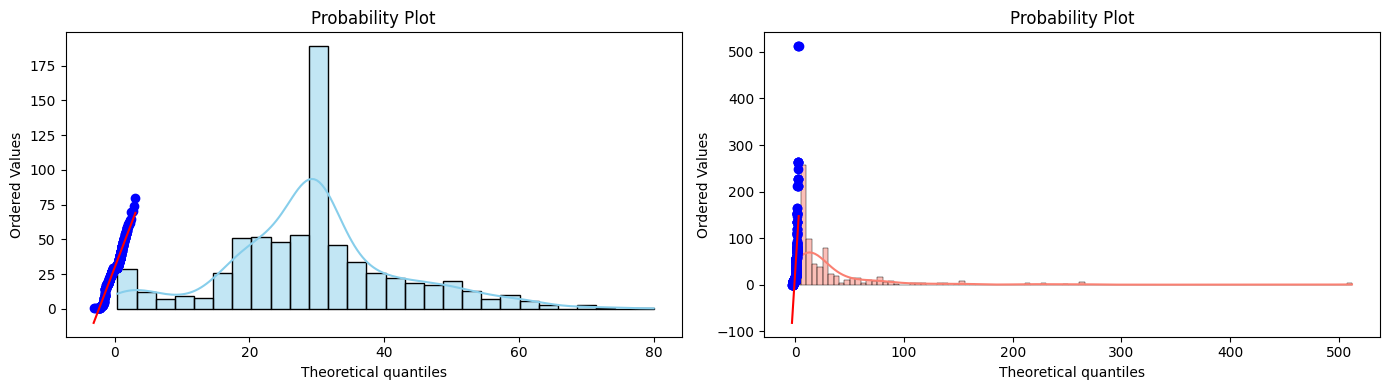

In [70]:
plt.figure(figsize=(14, 4))

# First subplot - Age
plt.subplot(1, 2, 1)
sns.histplot(x_train['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
stats.probplot(x_train['Age'], plot=plt)

# Second subplot - Fare
plt.subplot(1, 2, 2)
sns.histplot(x_train['Fare'], kde=True, color='salmon')
plt.title('Fare Distribution')
stats.probplot(x_train['Fare'], dist='norm', plot=plt)

plt.tight_layout()
plt.show()

In [73]:
clf=DecisionTreeClassifier()
clf2=LogisticRegression()

In [74]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred=clf.predict(x_test)
y_pred2=clf2.predict(x_test)

In [77]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))

0.6871508379888268
0.6480446927374302


use of function transformer

In [78]:
trf=FunctionTransformer(np.log1p)

In [79]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

In [80]:
clf.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)

LogisticRegression()

In [81]:
y_predd=clf.predict(x_test_trans)
y_pred22=clf2.predict(x_test_trans)

In [82]:
print(accuracy_score(y_test,y_predd))
print(accuracy_score(y_test,y_pred22))


0.6703910614525139
0.6815642458100558
